<a href="https://colab.research.google.com/github/hkuennemann/Deep-Learning-PyTorch/blob/main/01_PyTorch_Workflow/01_pytorch_workflow_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

Let's explore an example PyTorch end-to-end workflow.

In [1]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}

what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt
import numpy as np

# Check PyTorch version
torch.__version__

'2.4.1+cu121'

## 1.Data (Preparing and Loading)

Data can be almost anything... in machine learning.

* Excel spreadsheet
* Images of any kind
* Text
* ....

MAchine Learning is a game of two parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with *known* **parameters**.

In [3]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1) # X is capatalized since it usually represents a matrix
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets
(one of the most important concepts in machine learning in general)

Let's create a training and test set with out data

In [5]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data? --> VISUALIZE!

In [6]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

   # Plot training data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})

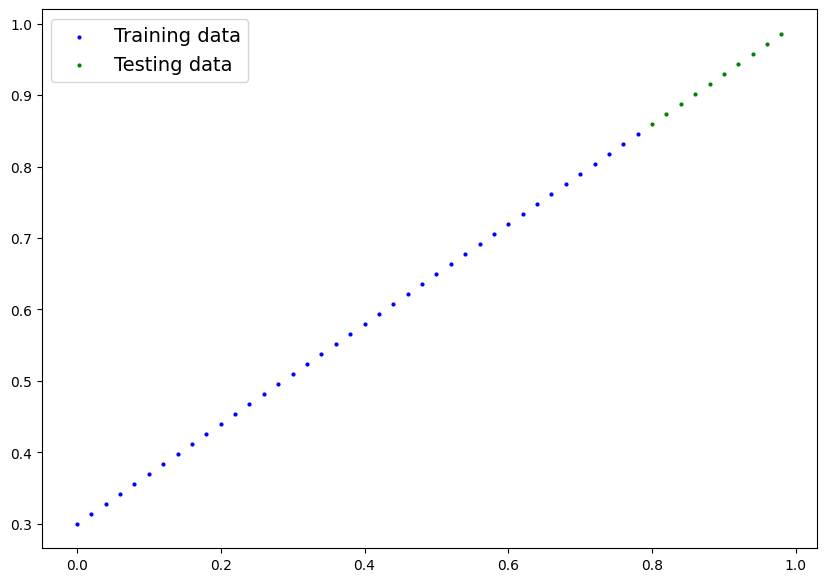

In [7]:
plot_predictions()

## 2.Build model

What our model does:
* Start with random values (weight and bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weights & bias values we used to create the data)

How does it do so?

Through two main algroithms:
1. Gradient descent
2. Back-propagagtion

In [8]:
# Create linear regression model class

class LinearRegressionModel(nn.Module): # almost everything in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()

    # Initialize model parameters
    self.weights = nn.Parameter(torch.randn(1, # start with a random weight and try to adjust it to the ideal weight
                                            requires_grad = True, # can this parameter be updated via gradient descent?
                                            dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1, # start with a random bias and try to adjust it to the ideal bias
                                         requires_grad = True, # can this parameter be updated via gradient descent?
                                         dtype = torch.float))

  # Forward method to define the computation in the model
  # --> Any subclass of nn.Module needs to override forward()
  def forward(self, x: torch.Tensor) -> torch.Tensor: # x is the input data
    return self.weights * x + self.bias # linear regression formula


In [22]:
# we can also create the same thing, without initializing the model parameters by ourselves, but rather use the power of nn.Module
class LinearRegressionModelV2(nn.Module): # almost everything in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()

    # Use nn.Linear() for creating model parameters
    self.linear_layer = nn.Linear(in_features = 1,
                                  out_features = 1)

  # Also the forward functions becomes simpler
  def forward(self, x) -> torch.Tensor:
    return self.linear_layer(x)

In [23]:
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.8815]])),
              ('linear_layer.bias', tensor([-0.7336]))]))

### PyTorch model building essentials
* torch.nn - Contains all of the buildings for computational graphs (neural networks can be considered as computational graphs)
* torch.nn.Parameter - What parameters should our model try and learn; often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural networks; if you subclass it, you should overwrite forward()
* torch.optim - This is where the optimizers in PyTorch live; they will help with gradient descent
* torch.utils.data.Dataset - Represents a map between key (label) and sample (features) pairs of your data
* torch.utils.data.DataLoader - Creates a Python iterable over a torch Dataset (allows you to iterate over your data)

### Checking the contents of our PyTorch model

Now we've created a model, let's see what is inside. We can check our model parameters or see what is inside our model using `.parameters()`

In [9]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using `torch.inference_mode()`

To check our model's predictive poers, let's see how well it predicts `y_test` based on `x_test`.
When we pass data through our model, it is going to run it through the `forward()` method.

In [11]:
# Make predictions with model
with torch.inference_mode(): # -> does not keep track of the gradients anymore -> faster predictions!
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

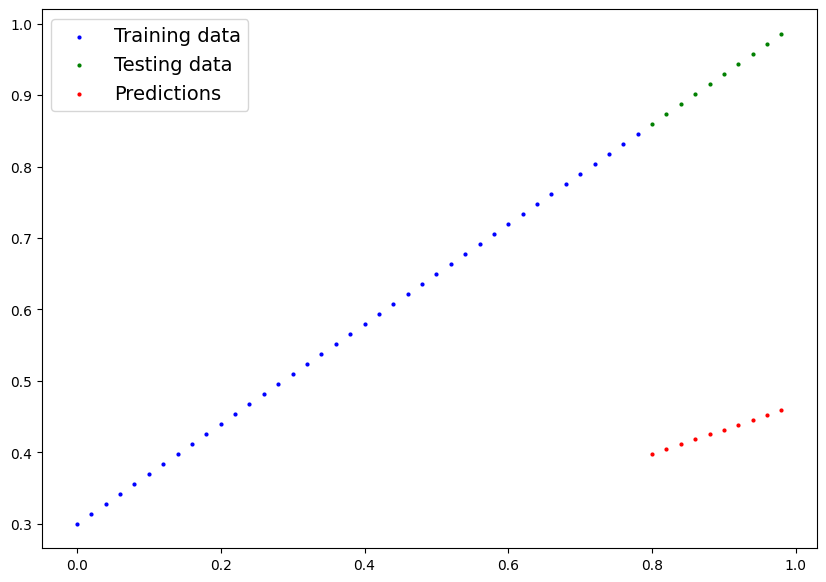

In [12]:
plot_predictions(predictions = y_preds)

## 3.Train model

The whole idea is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are is to use a loss function.

* Note: Loss function may also be called cost-function or criterion in other areas

Things we need to train:

* **Loss function**: A function to measure how wrong your model's predictions are to the ideal outputs. Thus, lower is better.
* **Optimizer**: Takes into account the loss of a model and adjusts the model's parameters (e.g. weight and bias) to improve the loss function.
Inside the optimizer you'll often want to set two parameters
  * `params` - the model parameters you'd like to optimize, e.g. `params = model.parameters()``
  * `lr` - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step (a small `lr`results in small changes, a large `lr`results in large changes)

For PyTorch we need:
* A training loop
* A testing loop



In [13]:
# Setup a loss function
loss_fn = nn.L1Loss() # MAE

# Setup an optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01) # learning rate

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()`functions) to make predictions on the data
2. Calculate the loss (calculate forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - moves backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)


In [14]:
torch.manual_seed(42)

# An epoch is one loop through the data -> hyperparameter!
epochs = 200

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop through the data
for epoch in range(epochs): # <- pass the data through the model for a number of epochs
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train) # <- Pass the data through the model. This will perform the forward() method located within the model object

  # 2. Calculate the loss (how wrong the models predictions are)
  loss = loss_fn(y_pred, y_train) # input first, target second

  # 3. Optimizer zero grad
  optimizer.zero_grad() # gradients accumulate, so we want them to go back to zero at the beginning of each loop

  # 4. Perform backpropagation on the loss w.r.t. the parameters of the model
  loss.backward() # compute the gradient of each parameter with requires_grad = true

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizers changes will accumulate through the loop so... we have to zero them above in step three above for the next iteration

  ### Testing
  model_0.eval() # truns off different settings in the model not needed for testing

  with torch.inference_mode(): # truns off gradient tracking (and other things) not needed for testing -> faster performance!
    # 1. forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    # Track values
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

    # print out what is happening
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

    # print out model state_dict()
    print(model_0.state_dict())


Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

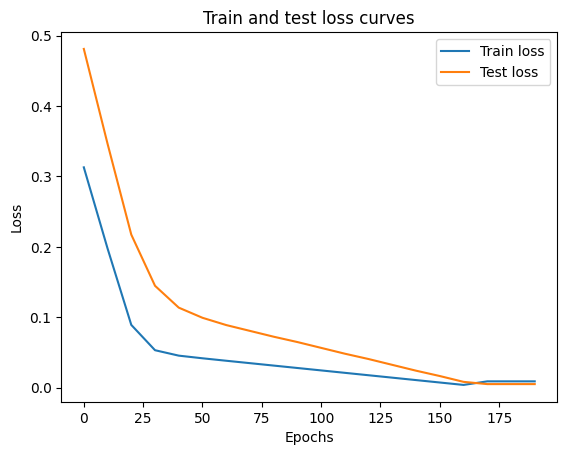

In [15]:
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label = "Train loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label = "Test loss")
plt.title("Train and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [16]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

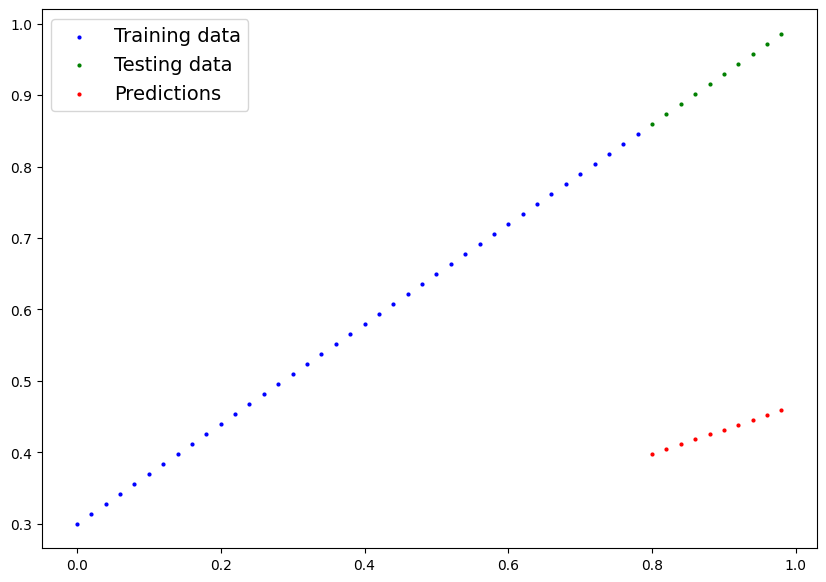

In [17]:
plot_predictions(predictions=y_preds)

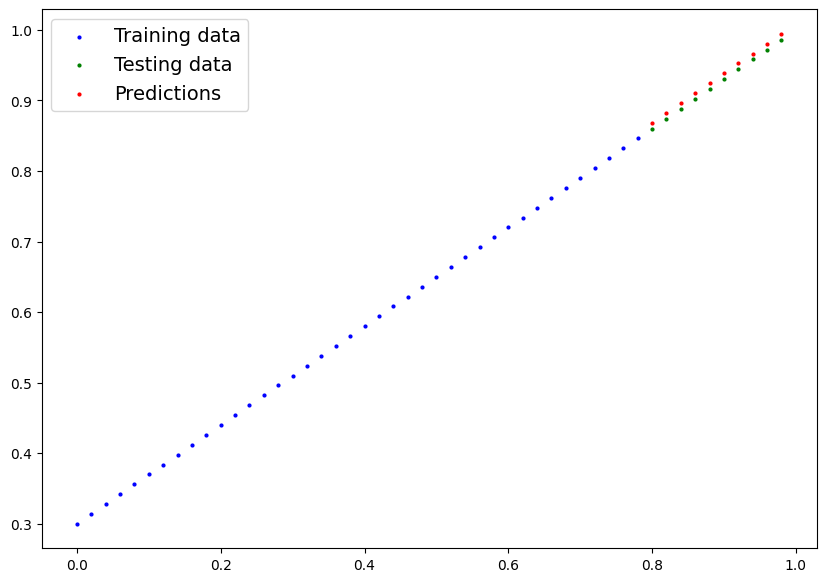

In [18]:
plot_predictions(predictions=y_preds_new)

## 4.Saving a model in PyTorch

There are three main methods you should know about for saving and loading models in PyTorch.

1. `torch.save()` - allows you to save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary



In [19]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(),
           f = MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


## 5.Loading a PyTorch model

Since we saved our model's `state_dict()` rather than the entire model, we will create a new instance of our model class and load the saved `state_dict()` into that.

In [21]:
# To load in a saved state_dict we have to instantiate a new instance of our model class

loaded_model_0 = LinearRegressionModel() # Has random parameters again

# Load the saved state_dict of model_0
loaded_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

# Make some predictions with original model
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

# Compare loaded model preds with originial model preds
y_preds == loaded_model_preds

<ipython-input-21-828cf43d07ab>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH))


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])